# July 2023 Cu-F

dTHF + LiBF4 + dEtOH



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON/bayesian_analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [9]:
# Data analysis directory
project_dir = os.path.expanduser('~/git/TrON/example_analysis')

# Upper-level data directory for the time-resolved data
data_dir = os.path.join(project_dir, 'data')

# Directory where we store dynamic fit results
dyn_model_dir = os.path.join(project_dir, 'dyn-fitting')



# Auto-reduction directory
#ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
#fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/'

dynamic_run = 207168 # Cycle 1

#dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-F/30s'
dyn_fit_dir = os.path.join(dyn_model_dir, '207168-dyn/results-30s-bck')



## Summary of 60 Hz data

/Users/m2d/git/TrON/example_analysis/dyn-fitting/207161/__model-profile.dat
/Users/m2d/git/TrON/example_analysis/dyn-fitting/207169/__model-profile.dat


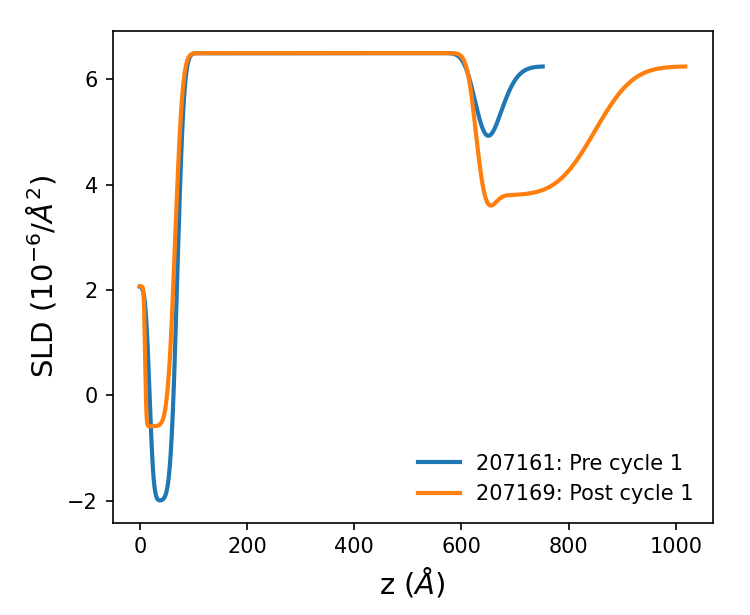

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207161, "207161: Pre cycle 1", fit_dir=dyn_model_dir, show_cl=False)
summary_plots.plot_sld(207169, "207169: Post cycle 1", fit_dir=dyn_model_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


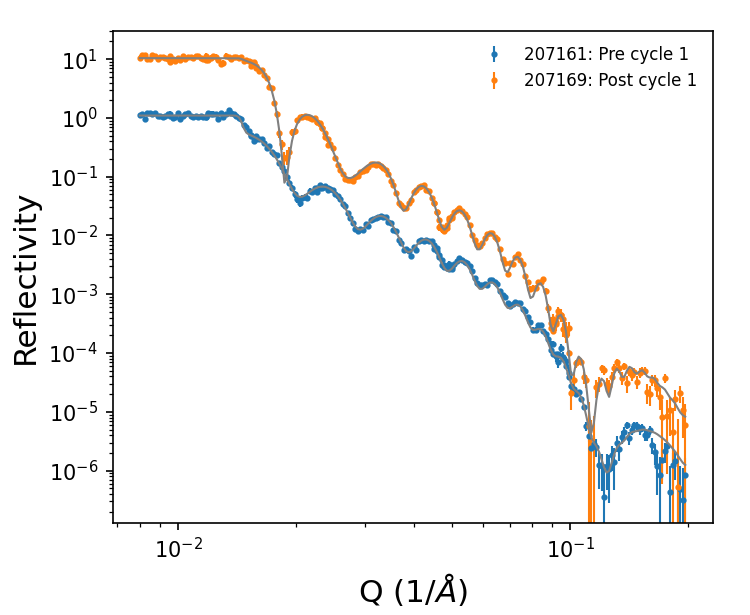

In [6]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207161, '207161: Pre cycle 1', fit_dir=dyn_model_dir, ar_dir=data_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207169, '207169: Post cycle 1', fit_dir=dyn_model_dir, ar_dir=data_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


23


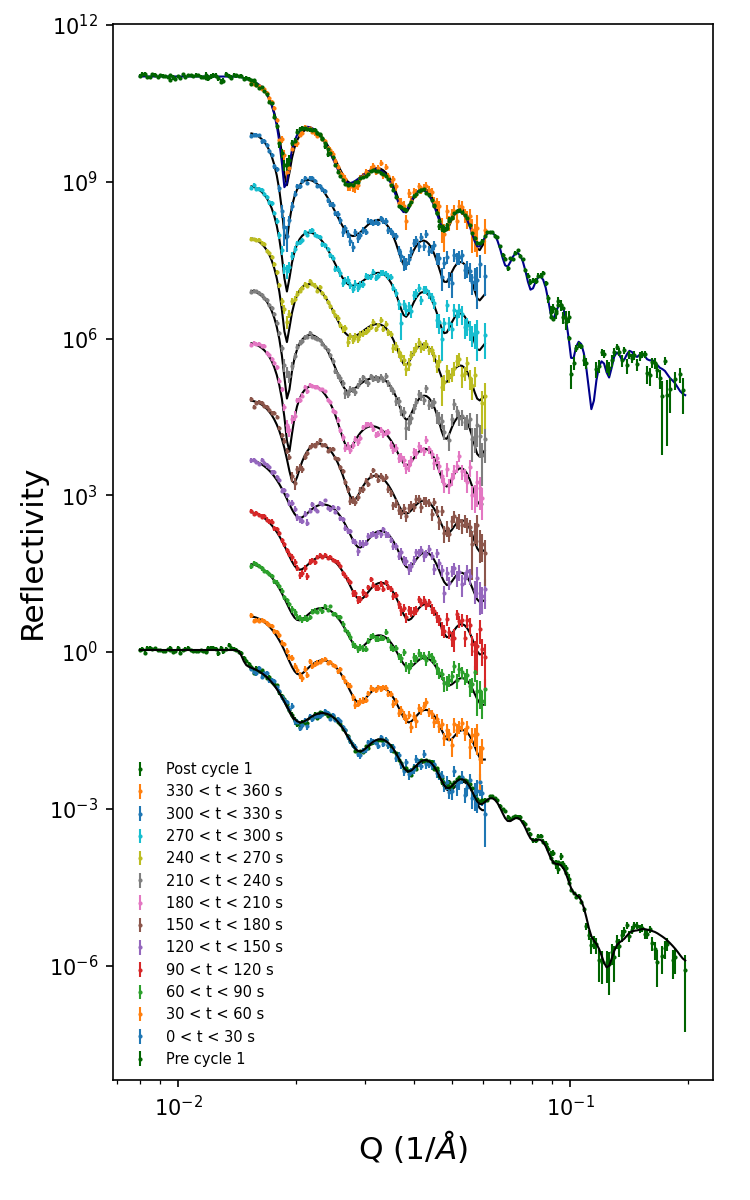

In [11]:
importlib.reload(summary_plots)

file_list = summary_plots.plot_dyn_data(dynamic_run, 207161, 207169, first_index=0, last_index=12, delta_t=30, model_name='model-loop-207168',
                                        fit_dir=dyn_model_dir, ar_dir=data_dir, dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir)

/Users/m2d/git/TrON/example_analysis/dyn-fitting/207161/__model-profile.dat
Processing: /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Read in /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Model: /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000090/model-loop-207168
Z offset = -171.441;    Z_max = 1022.3
Too many points: pruning down
MC file read: 0.0004467964172363281 sec
Done 2.953727960586548 sec
Processing: /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Read in /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000330/model-loop-207168.py
Model: /Users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck/r207168_t000120/model-loop-207168
Z offset = -171.624;    Z_max = 1024.9
Too many points: prunin

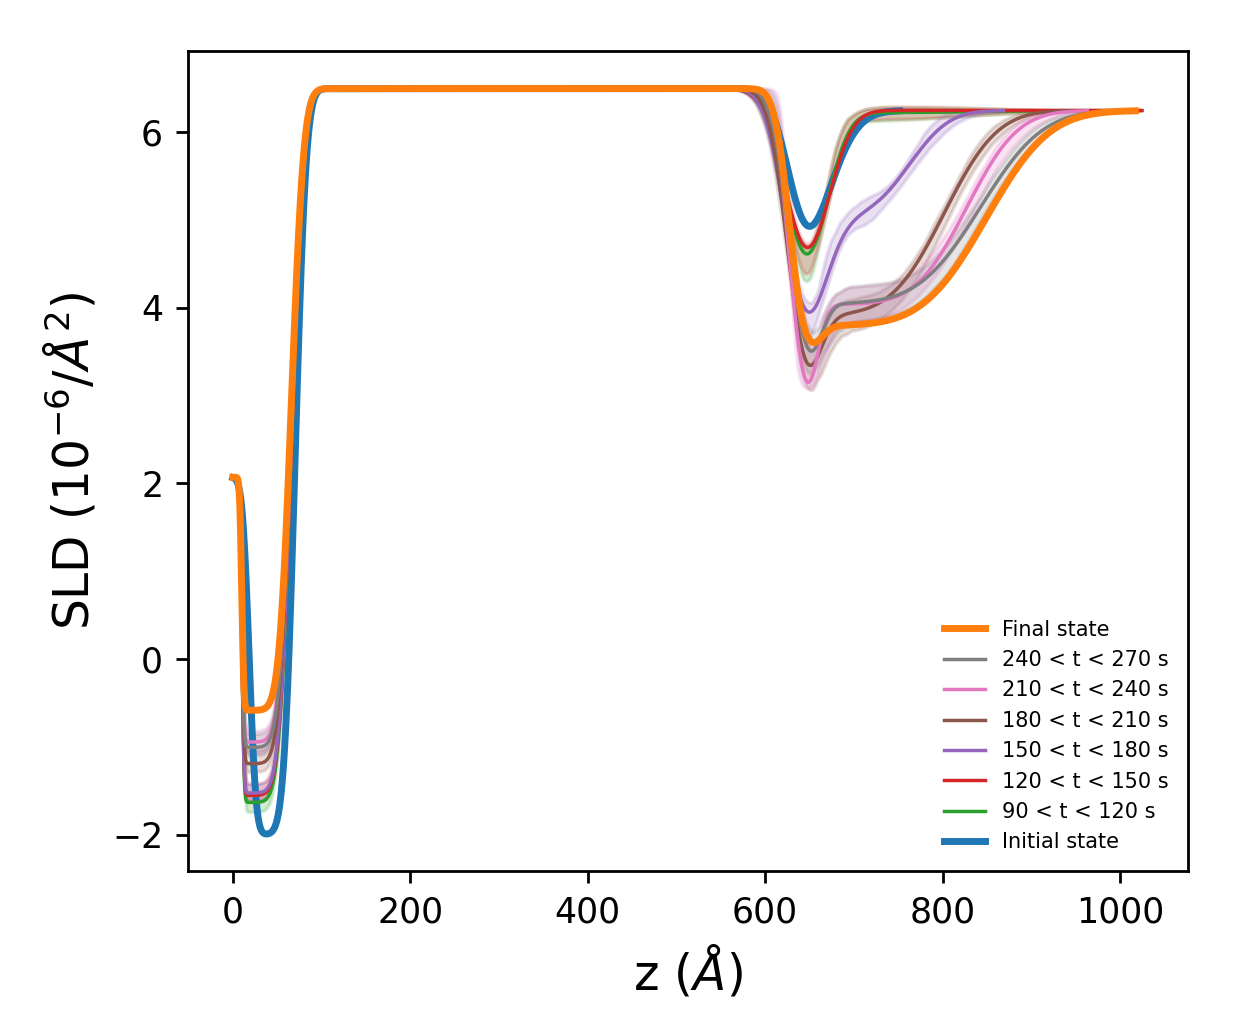

In [15]:
# Plot manual fits
importlib.reload(summary_plots)

# model_file = os.path.join(project_dir, 'model-207275.py')
model_file = os.path.join(dyn_fit_dir, str(file_list[-1][2]), 'model-loop-207168.py')

_file_list = [file_list[i] for i in [3,4,5,6,7,8]]

summary_plots.plot_dyn_sld(_file_list, 207161, 207169, 
                           fit_dir=dyn_model_dir, dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=True, model_file=model_file, model_name='model-loop-207168')

THF interface 29.767315099895264
material interface 18.6680172612351
material rho 3.690244438447533
material thickness 33.21387416625166
Ti rho -1.9982523408587178


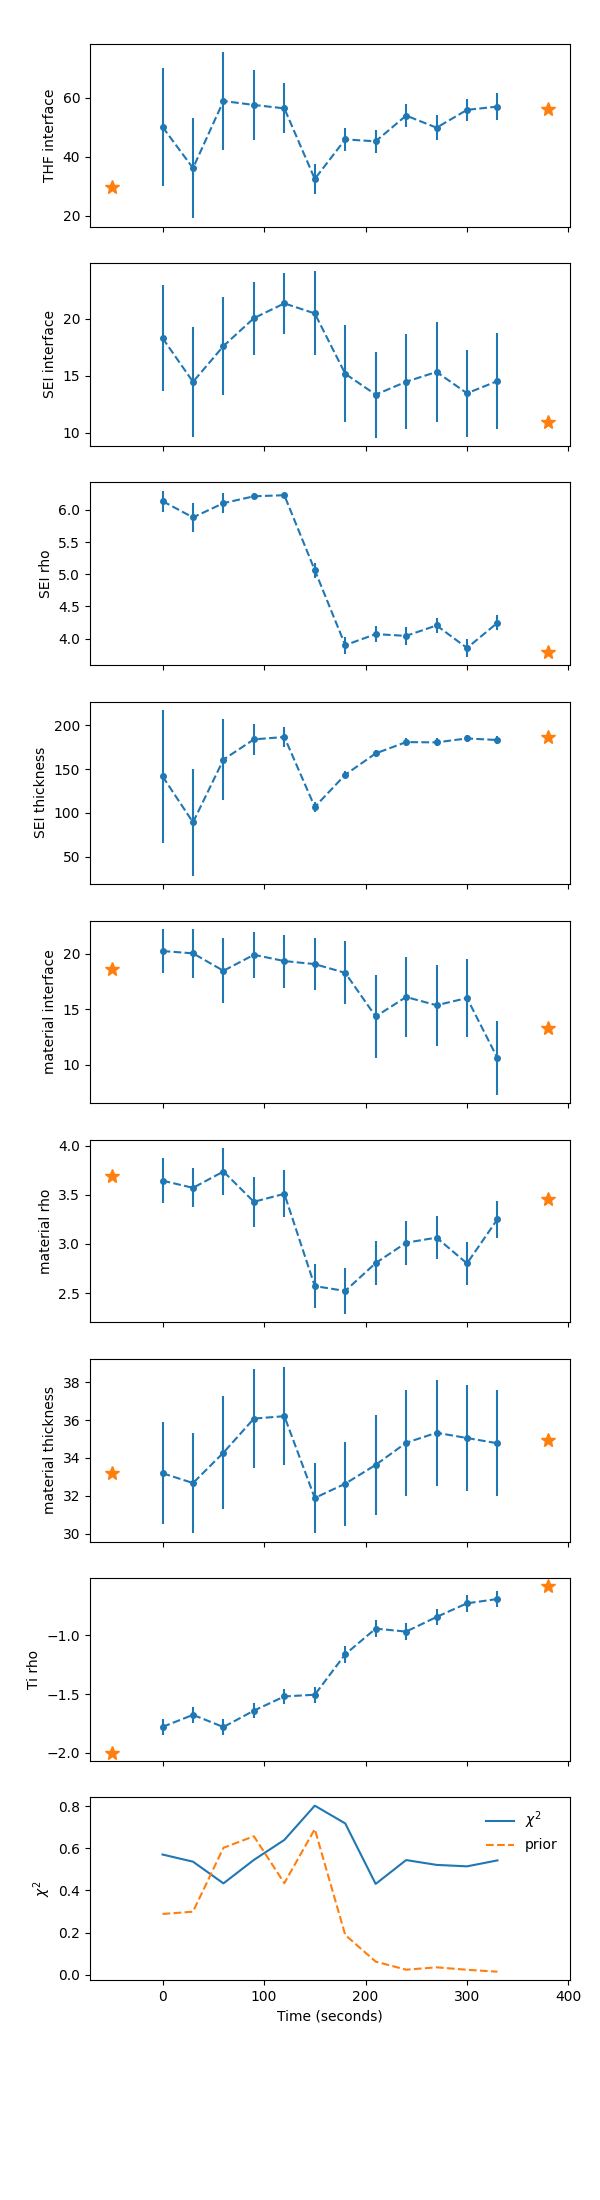

In [17]:
importlib.reload(summary_plots)

initial_state = 207161
trend_values, trend_err = summary_plots.trend_data(file_list, initial_state, 207169, 
                                                   fit_dir=dyn_model_dir, dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir, 
                                                   model_name='model-loop-207168', model_file=None, add_plot=0)


In [18]:
importlib.reload(summary_plots)

trend_file = os.path.join(dyn_fit_dir, 'trend-model-loop-207168.json')
summary_plots.write_md_table(trend_file)